In [ ]:
import sys
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.insert(0, str(Path.cwd().parent))

from poly_fitting import PolynomialFitter, PolynomialVisualizer


In [ ]:

def generate_multiple_datasets(
    varying_param: list[int],
    param_type: str = "noise",
    base_order: int = 3,
    fixed_samples: int = 50,
    fixed_noise: float = 100
):
    """
    Generate multiple datasets with either varying noise or sample size.

    Parameters:
        varying_param: List of noise scales or sample sizes.
        param_type: Either 'noise' or 'samples'.
        base_order: Polynomial order for model.
        fixed_samples: Used when varying noise.
        fixed_noise: Used when varying sample size.

    Returns:
        List of (x, y, label) tuples.
    """
    datasets = []
    for param in varying_param:
        if param_type == "noise":
            model = PolynomialFitter(base_order, fixed_samples, noise_scale=param)
        elif param_type == "samples":
            model = PolynomialFitter(base_order, param, noise_scale=fixed_noise)
        else:
            raise ValueError("param_type must be 'noise' or 'samples'")
        model.generate_data()
        datasets.append((model.x, model.y, str(param)))
    return datasets


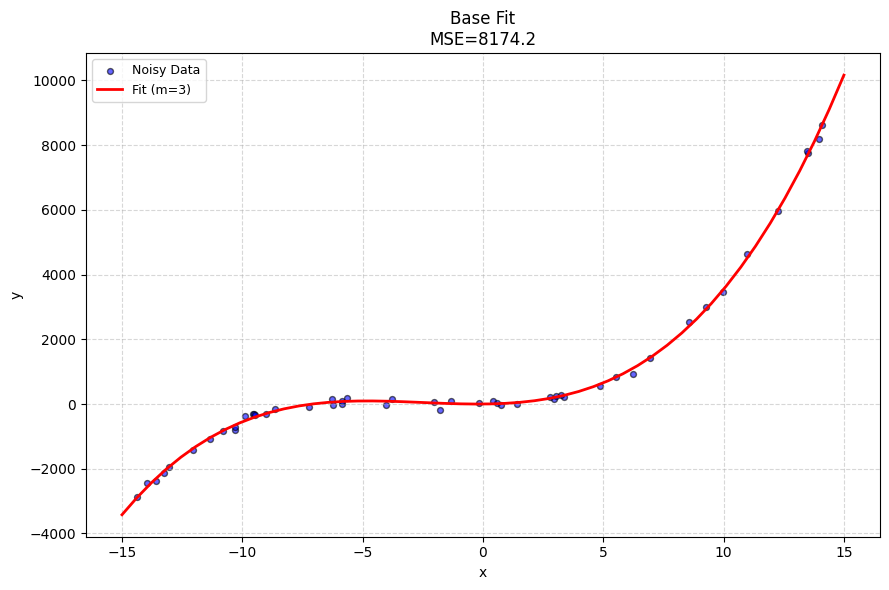

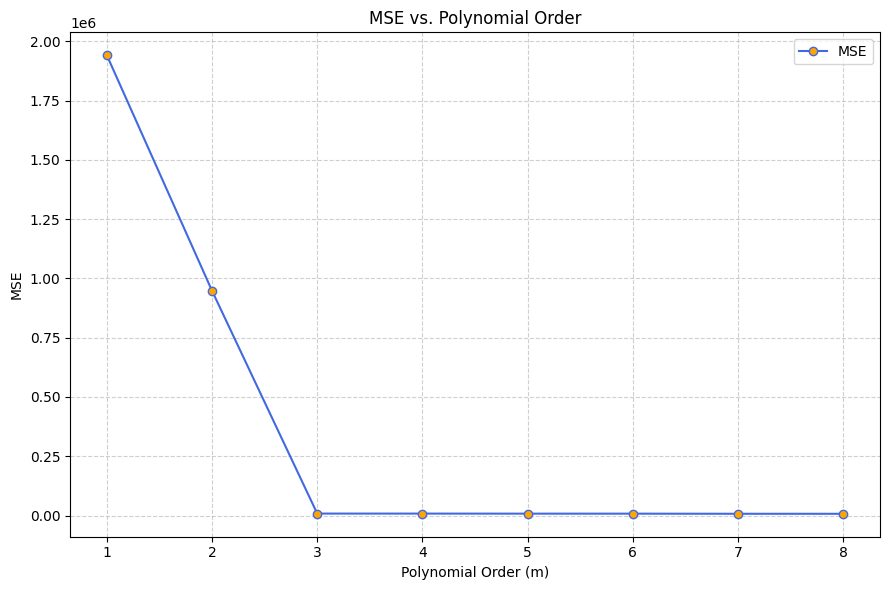

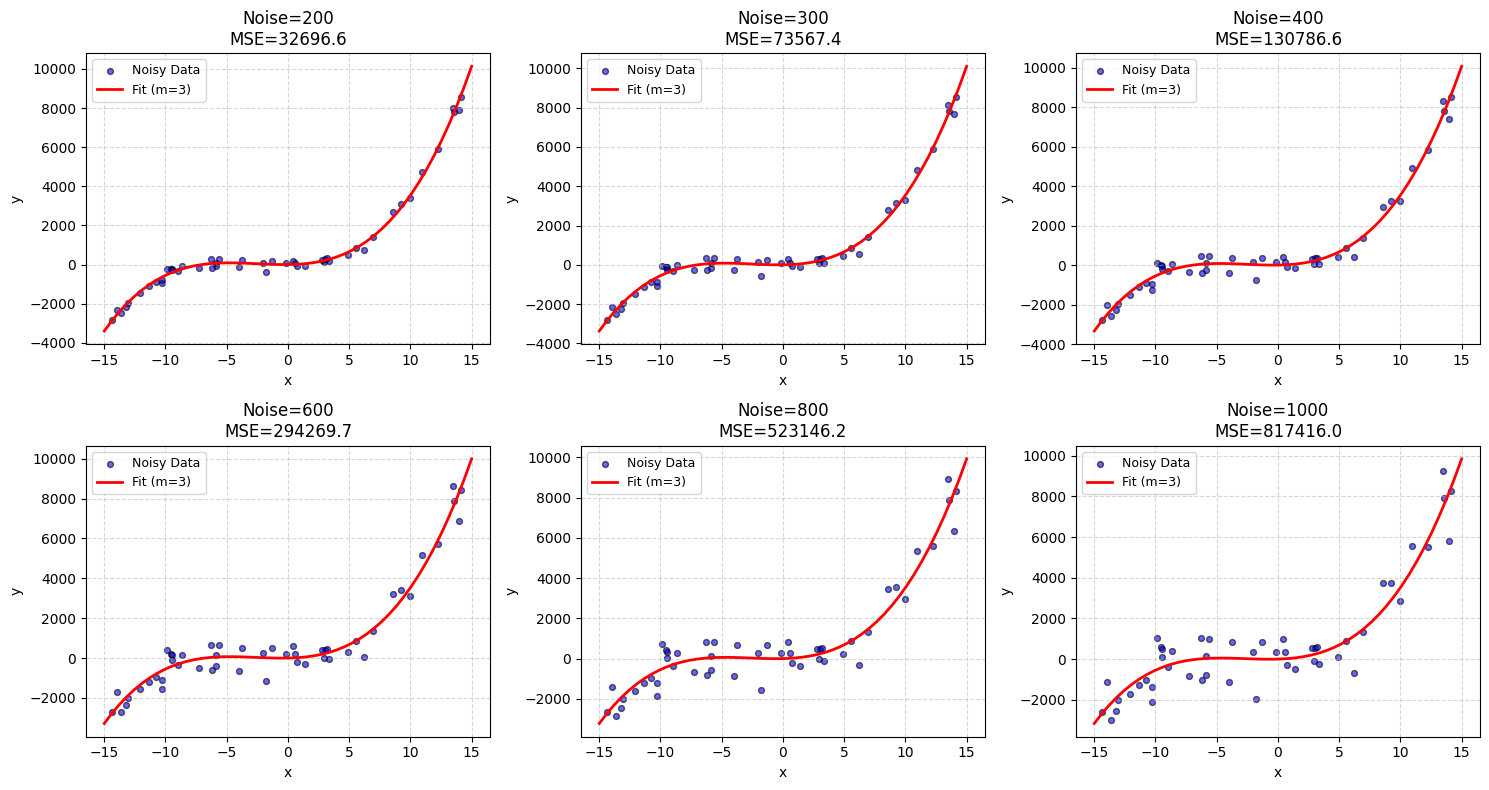

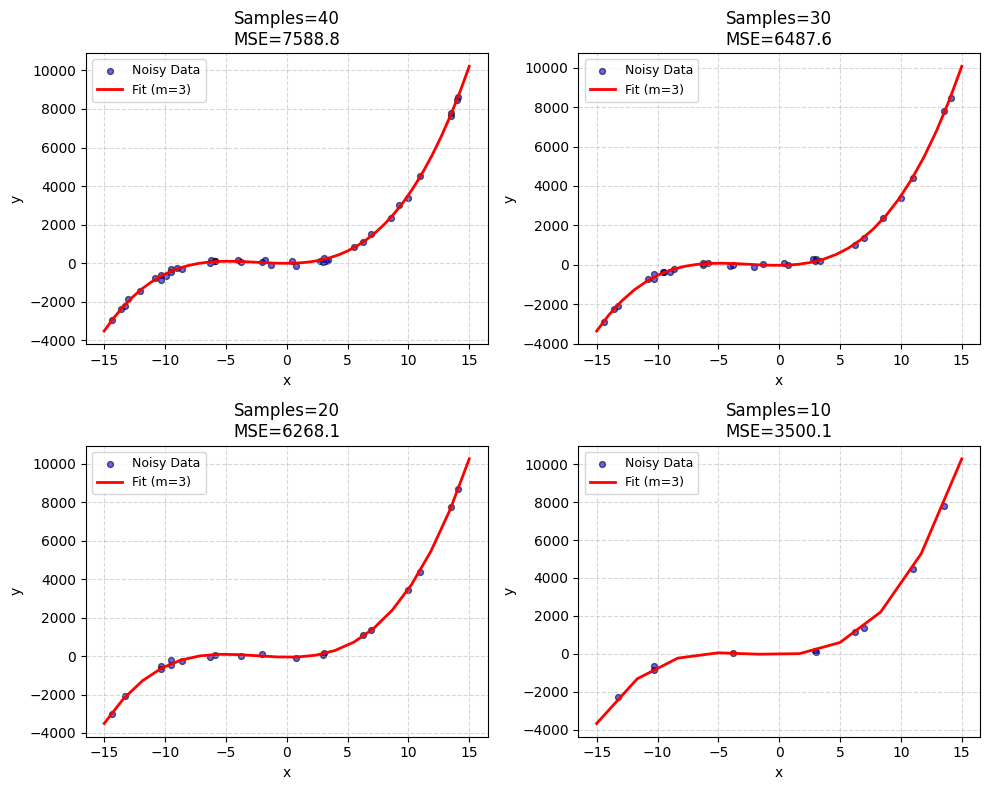

In [ ]:

# === Base fit visualization ===
viz = PolynomialVisualizer()
model = PolynomialFitter(order=3, n_samples=50, noise_scale=100)
model.generate_data()
model.fit()

fig, ax = plt.subplots(figsize=(9, 6))
viz.fit_and_plot(model.x, model.y, model.order, ax, "Base Fit")
plt.tight_layout()
plt.show()

# === MSE curve ===
orders = list(range(1, 9))
viz.plot_mse_curve(model.x, model.y, orders)

# === Noise robustness plot ===
noise_levels = [200, 300, 400, 600, 800, 1000]
datasets_noise = generate_multiple_datasets(noise_levels, param_type="noise")
viz.plot_grid_variation(datasets_noise, order=3, rows=2, cols=3, title_prefix="Noise")

# === Sample size robustness plot ===
sample_sizes = [40, 30, 20, 10]
datasets_samples = generate_multiple_datasets(sample_sizes, param_type="samples")
viz.plot_grid_variation(datasets_samples, order=3, rows=2, cols=2, title_prefix="Samples")


# Discussion

## Identify the best choice of m
Based on the graph, the best choice of m is 3 or higher, since there is minimal changes in MSE after order 2. This means that a 3rd order polynomial is the best estimate of the noisy data, since it is the lowest order with a low MSE score. 

## impact of noise scale on accuracy

Increasing the noise scale increases the dataset's variance. This can be seen in how the spread of original data increases with the noise scale. The trends in the data increase in complexity with a higher variance, making it more difficult to fit the data to the 3rd degree polynomial model and decreasing the accuracy of the returned predictions. This is also shown by the increasing RMSE as noise scale increases.

## impact of the number of samples on accuracy

As the number of samples decreases, the prediction accuracy decreases. This can be seen by both MSE and RMSE decreasing as sample size decreases, except for a sample size of 10, since it is too small to generalize the data well. This caused overfitting and increases the RMSE and MSE since it fits closely to the training data, but is unlikely to be able to fit new test data accurately, make it the worst model overall.